In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from allison.linear_model import LogisticRegression
from allison.datasets import train_test_split
from allison.metrics import classification_report, confusion_matrix

In [4]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
labels2id = {label: i for i, label in enumerate(data['Species'].unique())}
id2labels = {i: label for i, label in enumerate(data['Species'].unique())}

In [6]:
data['labels']=data['Species'].map(labels2id)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


Text(0, 0.5, 'Sepal Width')

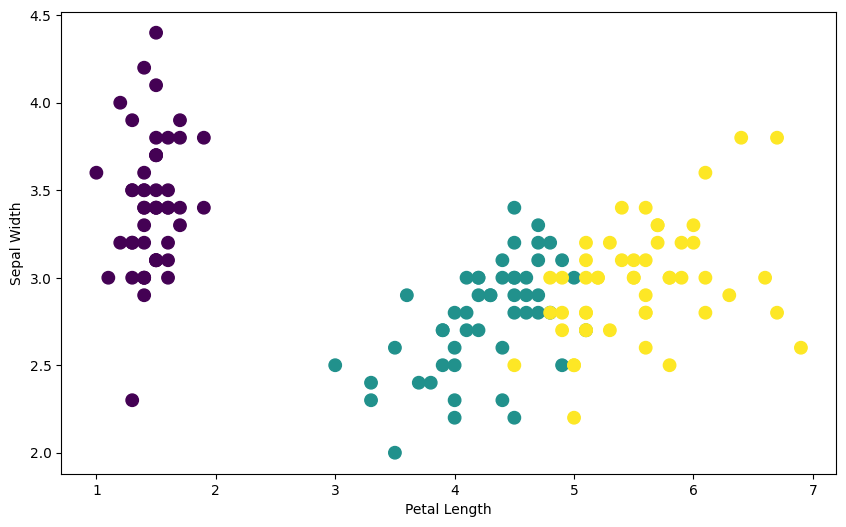

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(data['PetalLengthCm'],data['SepalWidthCm'],s=80,c=data['labels'] )
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")

In [8]:
independent_features=['PetalLengthCm','SepalWidthCm','PetalWidthCm','SepalLengthCm']
dependent_feature='labels'

In [9]:

data_train,data_test=train_test_split(data,test_size=0.2)

X_train=data_train[independent_features]
Y_train=data_train[dependent_feature]

X_test=data_test[independent_features]
Y_test=data_test[dependent_feature]

In [10]:
model = LogisticRegression()
model.fit(X_train,Y_train)
score = model.score(X_test, Y_test)
score

np.float64(1.0)

In [11]:
model.coef_

array([[-2.93516291, -0.9567939 ,  0.7768001 ],
       [ 2.99902475, -0.32407694, -1.29866272],
       [-2.23765688, -0.54116713,  2.31439684],
       [ 0.37839486,  1.15832989, -0.09663637]])

In [12]:
model.intercept_

np.float64(1.9552395432653173)

In [13]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 0, 1, 2, 0, 1, 2])

In [14]:
Y_test.to_numpy()

array([1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 0, 1, 2, 0, 1, 2])

In [15]:
print(classification_report(Y_test, model.predict(X_test)))

            precision   recall f1-score  support
0                1.00     1.00     1.00        7
1                1.00     1.00     1.00       11
2                1.00     1.00     1.00       12

accuracy                           1.00       30
macro avg        1.00     1.00     1.00       30
weighted avg     1.00     1.00     1.00       30


<Axes: >

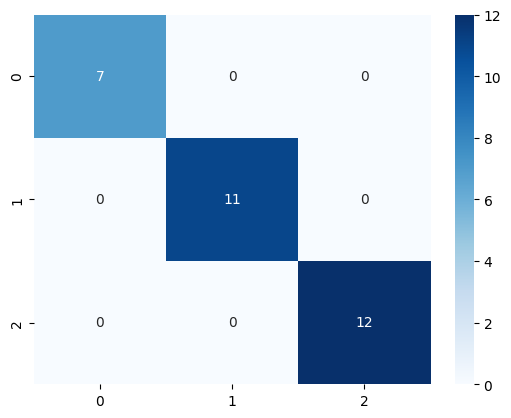

In [16]:
sns.heatmap(confusion_matrix(Y_test, model.predict(X_test)), annot=True, cmap="Blues", fmt=".0f")

In [17]:
model.predict_proba(X_test)

array([[0.  , 0.74, 0.26],
       [0.88, 0.12, 0.  ],
       [0.  , 0.86, 0.13],
       [0.  , 0.69, 0.3 ],
       [1.  , 0.  , 0.  ],
       [0.02, 0.81, 0.17],
       [0.  , 0.16, 0.84],
       [0.  , 0.14, 0.86],
       [1.  , 0.  , 0.  ],
       [0.04, 0.88, 0.08],
       [0.  , 0.05, 0.95],
       [0.  , 0.44, 0.56],
       [0.99, 0.01, 0.  ],
       [0.  , 0.06, 0.94],
       [0.98, 0.02, 0.  ],
       [0.  , 0.79, 0.21],
       [0.  , 0.18, 0.82],
       [0.  , 0.16, 0.84],
       [0.01, 0.81, 0.18],
       [0.  , 0.24, 0.76],
       [0.  , 0.78, 0.22],
       [0.01, 0.89, 0.11],
       [0.  , 0.12, 0.88],
       [0.  , 0.23, 0.77],
       [0.99, 0.01, 0.  ],
       [0.01, 0.89, 0.1 ],
       [0.  , 0.16, 0.84],
       [1.  , 0.  , 0.  ],
       [0.01, 0.86, 0.13],
       [0.  , 0.12, 0.88]])

In [18]:
model.features_names

['PetalLengthCm', 'SepalWidthCm', 'PetalWidthCm', 'SepalLengthCm']

In [19]:
data_test['pred_labels'] = model.predict(X_test)
data_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels,pred_labels
91,92,6.1,3.0,4.6,1.4,Iris-versicolor,1,1
41,42,4.5,2.3,1.3,0.3,Iris-setosa,0,0
58,59,6.6,2.9,4.6,1.3,Iris-versicolor,1,1
90,91,5.5,2.6,4.4,1.2,Iris-versicolor,1,1
48,49,5.3,3.7,1.5,0.2,Iris-setosa,0,0
88,89,5.6,3.0,4.1,1.3,Iris-versicolor,1,1
107,108,7.3,2.9,6.3,1.8,Iris-virginica,2,2
124,125,6.7,3.3,5.7,2.1,Iris-virginica,2,2
21,22,5.1,3.7,1.5,0.4,Iris-setosa,0,0
57,58,4.9,2.4,3.3,1.0,Iris-versicolor,1,1


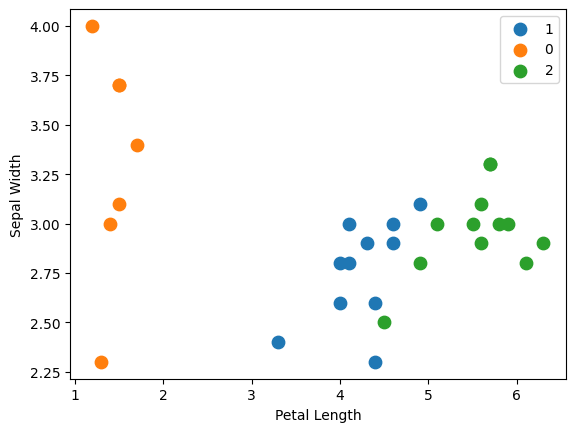

In [20]:
for label in data_test['pred_labels'].unique():
    label_data = data_test[data_test['pred_labels'] == label]
    plt.scatter(label_data['PetalLengthCm'],label_data['SepalWidthCm'],s=80 ,label=label )
    plt.legend()
    plt.xlabel("Petal Length")
    plt.ylabel("Sepal Width")